# Operations Data Analysis Project

<strong>1. Provide advice on what tranches inventory should be “fast-tracked” through the warehouse, if any.</strong>

Based on weighted averages of the total time to process, tops, dresses, and sweaters contribute more to the final weighted average of overall processing time.

Active pants, tops, and dresses have the highest weighted average QA station time.

Tops, dresses, and sweaters have the highest weighted average photo, itemization, and QA station times.

Tops, dresses, and sweaters in the brand tier groups of value and mass contribute most to the weighted average total time to process.

=================================================================================================

<strong>2. What are the caveats of your approach? Is there any additional data you would like to have that may help define this inventory?</strong>

There appears to be two types of zero values in the station time columns. Zeros because the items were rejected before reaching the station and zeros for accepted items which may mean the item was fast tracked through the station for one reason or another. Where applicable in my analysis, I filtered rejected items that had zero values in the station under analysis. I made the assumption that these items were rejected before reaching the station and should not be factored into station averages.

I didn't analyze the dates items were processed or received by the warehouse because this information was not available in the data set.

The date received by the warehouse might help analyze the inventory processing times in these categories. 

Interesting to note, although less relevant when using weighted averages ... we can look at the amount of items that arrive for processing on each day to see if that influences processing times. The amount of items being received in these groups by time of year might also influence processing times. In other words, there may be times when more of the high processing time items are entering the warehouse and bottlenecking the process. If we have the date received, we can test this hypothesis.

With the date an item begins processing at the first station, we can see how long an item waits to begin processing after arriving at the warehouse. The difference in time until an item begins processing after arriving at the warehouse could be useful in directing solutions to lower processing time.  

The time between stations could also be useful to see if a bottleneck is building up during the process.

=================================================================================================

<strong>3. How would you go about testing whether or not “fast tracking” inventory is effective?</strong>

I would look at the change in weighted average processing times at each of the stations and overall. The caveat to this is if we implement fast-tracking across all the inventory in these groups, we can't observe the counterfactual had we not implemented this change. Thus, any changes in the KPIs are merely approximations of the effect of the fast-tracking rather than the actual treatment effect. If we want a more concrete measure of the effect of the fast tracking on the processing times, then we need to implement a quasi-experimental regression design.

Another option to test whether the fast tracking is effective is to randomly assign incoming inventory into control and treatment groups. If we run an experiment like this, we can feel more confident that the difference in processing times between these two groups is a valid measure of the effectiveness of fast tracking. 

In either method, to measure the effectiveness of fast tracking, we need to consider other outside influences on processing times:
        
1. Differences in how quickly individual employees process inventory, percent of new hires, or changes in staffing levels.
2. Unobservable differences in the items which are not as good as randomly assigned between the treatment and control groups.
3. Time-effects, which would be particularly relevant if we choose to implement the fast-tracking without randomly assigning inventory to control and treatment groups. In other words, if we compare KPIs to KPIs from one or two months ago, then there may be unaccounted for time effects at play. Identifying why processing times vary by date is still crucial.
       
        
We could choose from a number of regression designs including:
        
1. Differences-in-differences: Using the trend of the control group to approximate a counterfactual and assuming the treatment group follows the same trend before the treatment is implemented (parallel trends assumption).
2. Propensity score matching: To compare "apples-to-apples" on observable differences assuming that the unobservable differences are as good as randomly assigned.

=========================================================================================================================

<strong>4. What metrics or KPIs would you look at? Anything else to note?</strong>

I would look at changes in the average processing time controlling for the station, brand tier, warehouse, and/or price although as segmenting increases, the amount of items within each group decreases (something to watch). 
<ul>
    <li> Company level: Average time to process across all warehouses.</li>
    <li> Warehouse level: Average time to process at each warehouse. </li>
    <li> Individual level: Average time to process across employees. </li>
</ul>
Time to process seems to vary between warehouses. The reason for this should be explored further.

Possible Explanations:
       
1. Amount of inventory being processed 
2. Diversity of inventory (lack of specialization)
3. Differences in average years of processing experience between employees at the warehouses
    
=========================================================================================================================

<strong>5. Explore the data and note any additional observations. This is meant to be open-ended.</strong>

Although rejected items take less time to process overall, if there is a way to make the rejection decision at an earlier point in time, then the warehouses may be able to reduce item processing times. Based on this data, 81% of rejected items are rejected at the itemization station. If the warehouses are able to change the process in a way to reject items before the itemization station, then there could be an opportunity for time savings. 
    
Warehouses DC02 and DC05 take the longest time to process merchandise and also receive the most merchandise out of all the other warehouses, particularly in the long-to-process item categories. This information could potentially lead to a testable solution like rerouting items between the warehouses, changing staffing levels at the warehouses, or distributing responsibilities differently based on the levels of each category received by the warehouses.

========================================================================================================================

<strong>Assumptions</strong><br>
<ul>
    <li>The data is for new inventory items entering the warehouse.</li>
    <li>Station times are in minutes.</li>
    <li>The listing date, purchase date, and time at each station do not shed light on when the item arrives at the warehouse or on what date processing begins.</li>
    <li>Rejected items with zeros in the station time column represents when it was rejected and removed from processing</li>
    <li>Accepted items with zeros in the station time column represent actual time spent at that station, possibly due to fast-tracking</li>
    </ul>
    </ol>

<strong>Variables</strong><br>
<ul>
    <li> item_id : id of the clothing item </li>
    <li> warehouse : distribution center where item is processed </li>
<li> gender : designates kids or womens </li>
<li>item_category : category of clothing </li>
<li>brand_tier_group : Brand tiers are tagged by merchandising specialists for each brand. The
    higher the brand tier of an item, the more "luxury" / expensive the brand is. The order is value,
    mass, premium, and designer. </li>
<li>listing_price : the price the item was listed at on the website </li>
<li>item_listing_date : the date the item was listed on the site </li>
<li>item_purchase_date : the date the item was purchased by a customer, if any. </li>
<li>Item_accepted_or_rejected : whether the item was accepted into stockroom or rejected due to
quality issues </li>
<li>merch_station_time: how long the item spent at the merchandising station, where initial quality
inspection occurs </li>
<li>itemization_station_time: how long the item spent at the itemization station, where brand,
measurement, category, and other characteristics are recorded </li>
<li>photo_station_time: how long the item spent at the photo station, where its picture is taken for
listing on site </li>
<li>qa_time: how long the item spent in QA, where itemization values are cross-checked </li>

</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
%reload_ext sql

In [2]:
merch_processing = pd.read_csv("ops_analyst_challenge_data.csv", parse_dates = ['item_purchase_date' ,'item_listing_date'])

# SQL queries

In [3]:
engine = create_engine('sqlite:///merchprocessingdb.sql', echo=False)
merch_processing.to_sql('merch_processing', con=engine, if_exists='replace')
os.environ["DATABASE_URL"]='sqlite:///merchprocessingdb.sql'

In [4]:
%%sql
ALTER TABLE merch_processing ADD COLUMN total_time INT;

UPDATE merch_processing
SET total_time = merch_station_time + itemization_station_time + photo_station_time + qa_time;

Done.
25000 rows affected.


[]

In [5]:
%%sql
ALTER TABLE merch_processing ADD COLUMN long_processing_time bool; 

 * sqlite:///merchprocessingdb.sql
Done.


[]

In [6]:
%%sql

/*Add long_processing_time column based on average processing times in each item category */

WITH cte AS (
SELECT item_id, total_time, AVG(total_time) OVER(PARTITION BY item_category) as avg_time
FROM merch_processing)

UPDATE merch_processing
SET long_processing_time = True
WHERE merch_processing.item_id = (SELECT cte.item_id FROM cte WHERE cte.item_id = merch_processing.item_id)
                    AND merch_processing.total_time > (SELECT avg_time FROM cte WHERE cte.item_id = merch_processing.item_id);

    WITH cte AS (
SELECT item_id, total_time, AVG(total_time) OVER(PARTITION BY item_category) as avg_time
FROM merch_processing)
    
UPDATE merch_processing
SET long_processing_time = False
WHERE merch_processing.item_id = (SELECT cte.item_id FROM cte WHERE cte.item_id = merch_processing.item_id)
                    AND merch_processing.total_time <= (SELECT avg_time FROM cte WHERE cte.item_id = merch_processing.item_id);


 * sqlite:///merchprocessingdb.sql
Done.
Done.


[]

In [7]:
%%sql
/* average processing time by warehouse and item_category rounded to two decimal places 
    filtering out the rejected items that have zero values 
*/
WITH merch AS  
(
SELECT warehouse, item_category, CAST(COUNT(item_id) OVER(PARTITION BY warehouse, item_category) AS FLOAT)/COUNT(item_id) OVER() AS rate_inventory,
    item_accepted_or_rejected, merch_station_time, itemization_station_time, photo_station_time, qa_time
FROM merch_processing
WHERE item_category IN ('Tops & Blouses & Shirts', 'Dresses', 'Sweaters')
)

SELECT DISTINCT warehouse, item_category, rate_inventory*100 AS percent_inventory,
    rate_inventory*ROUND(AVG(merch_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (merch_station_time !=0)) OVER(PARTITION BY warehouse, item_category), 2)AS avg_merch_station_time,
    rate_inventory*ROUND(AVG(itemization_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (itemization_station_time !=0)) OVER(PARTITION BY warehouse, item_category),2) AS avg_itemization_station_time,
    rate_inventory*ROUND(AVG(photo_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (photo_station_time !=0)) OVER(PARTITION BY warehouse, item_category),2) AS avg_photo_station_time, 
    rate_inventory*ROUND(AVG(qa_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (qa_time !=0)) OVER(PARTITION BY warehouse, item_category),2) AS avg_qa_time
FROM merch
ORDER BY percent_inventory DESC

 * sqlite:///merchprocessingdb.sql
Done.


warehouse,item_category,percent_inventory,avg_merch_station_time,avg_itemization_station_time,avg_photo_station_time,avg_qa_time
DC02,Tops & Blouses & Shirts,14.657117629745903,4.940914352987344,8.199191602079857,12.379401550083388,0.568696164034141
DC05,Tops & Blouses & Shirts,14.50014715981556,4.853199254390268,8.69428823702541,8.910340429706663,None
DC02,Dresses,9.437849504561955,3.3343922299617383,5.587206906700677,8.38741685470421,0.47189247522809774
DC05,Dresses,9.172961836554498,3.3352889237712153,5.94499656627097,6.664156774256844,None
DC04,Tops & Blouses & Shirts,8.88845285980575,2.1758932600804477,3.8007024428529386,5.188189934268616,5.1286373001079175
DC02,Sweaters,8.868831551064456,3.1076385754929854,4.870762287844599,7.150051996468164,0.2953320906504464
DC03,Tops & Blouses & Shirts,8.290002943196312,2.431457863239478,4.085313450407143,5.502074953399393,0.5114931815952124
DC05,Sweaters,7.112724418718728,2.4674041008535266,4.022245658785441,4.319557539487883,None
DC04,Dresses,6.269008142843127,1.7252310409104286,2.7865741194937703,4.168263514176395,4.325615618561757
DC03,Dresses,5.013244383400373,1.5972196605513587,2.7823506327872067,4.432209359364269,0.3594496222898067


In [8]:
%%sql 
/*AVERAGE STATION TIMES ACROSS ALL ITEMS (UNWEIGHTED)*/
SELECT DISTINCT 
    ROUND(AVG(merch_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (merch_station_time !=0)) OVER(), 2)AS avg_merch_station_time,
    ROUND(AVG(itemization_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (itemization_station_time !=0)) OVER(),2) AS avg_itemization_station_time,
    ROUND(AVG(photo_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (photo_station_time !=0)) OVER(),2) AS avg_photo_station_time, 
    ROUND(AVG(qa_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (qa_time !=0)) OVER(),2) AS avg_qa_time
FROM merch_processing

 * sqlite:///merchprocessingdb.sql
Done.


avg_merch_station_time,avg_itemization_station_time,avg_photo_station_time,avg_qa_time
32.73,56.28,75.71,8.89


In [10]:
%%sql 
/*average total processing time by item_category and brand group rounded to two decimal places*/
WITH cte AS (
SELECT DISTINCT brand_tier_group, item_category,
    CAST(COUNT(item_id) OVER(partition by brand_tier_group, item_category) AS FLOAT)/COUNT(item_id) OVER() as rate_inventory,
    ROUND(AVG(total_time) OVER(PARTITION BY brand_tier_group, item_category),2) AS AVG_processing_time
FROM merch_processing
WHERE brand_tier_group NOT NULL AND item_id NOT NULL)

SELECT brand_tier_group, item_category, rate_inventory*100 AS percent_inventory, 
        rate_inventory*AVG_processing_time AS weighted_avg_time
FROM cte
ORDER BY weighted_avg_time DESC

 * sqlite:///merchprocessingdb.sql
Done.


brand_tier_group,item_category,percent_inventory,weighted_avg_time
1-Value,Tops & Blouses & Shirts,9.580969009166303,13.623179834133566
2-Mass,Tops & Blouses & Shirts,7.114797031863815,10.706346573548668
1-Value,Dresses,5.822784810126582,9.446303797468353
2-Mass,Dresses,4.251418594500218,7.036097773897861
1-Value,Sweaters,4.552597119161938,6.9677498908773465
1-Value,Tees & Tanks,5.032736796158883,6.318097773897862
2-Mass,Sweaters,3.736359668267132,5.782016586643387
2-Mass,Pants,2.4487123526844172,4.441719336534264
3-Premium,Tops & Blouses & Shirts,2.684417285028372,4.083535573985159
1-Value,Jeans,2.2304670449585333,3.9597481449148844


In [11]:
%%sql
/* number of items and average processing time overall by warehouse*/
WITH cte AS (
SELECT DISTINCT warehouse, 
        CAST(COUNT(item_id) OVER(partition by warehouse) AS FLOAT)/COUNT(item_id) OVER() AS item_count_rate, 
        ROUND(AVG(total_time) OVER(PARTITION BY warehouse), 2) AS avg_processing_time
FROM merch_processing 
WHERE item_id NOT NULL )

SELECT warehouse, item_count_rate*100 AS percent_of_inventory, item_count_rate*avg_processing_time AS weighted_avg_time,
        SUM(item_count_rate*avg_processing_time) OVER() AS sum_weighted_avg
FROM cte
ORDER BY weighted_avg_time DESC

 * sqlite:///merchprocessingdb.sql
Done.


warehouse,percent_of_inventory,weighted_avg_time,sum_weighted_avg
DC02,32.9253170126805,53.595831033241325,148.6322580903236
DC05,32.03328133125325,47.912178887155484,148.6322580903236
DC03,17.584703388135527,25.884683387335492,148.6322580903236
DC04,17.45669826793072,21.239564782591305,148.6322580903236


In [12]:
%%sql
/* Count by category */
WITH cte AS (
SELECT DISTINCT item_category, COUNT(item_id) OVER(PARTITION BY item_category) AS item_count, 
                CAST(COUNT(item_id) OVER(PARTITION BY item_category) AS FLOAT)/COUNT(item_id) OVER() AS rate_of_all_items,
                ROUND(AVG(merch_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (merch_station_time !=0)) OVER(PARTITION BY item_category), 2)AS avg_merch_station_time,
                ROUND(AVG(itemization_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (itemization_station_time !=0)) OVER(PARTITION BY item_category),2) AS avg_itemization_station_time,
                ROUND(AVG(photo_station_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (photo_station_time !=0)) OVER(PARTITION BY item_category),2) AS avg_photo_station_time, 
                ROUND(AVG(qa_time) FILTER(WHERE (item_accepted_or_rejected != 'rejected') & (qa_time !=0)) OVER(PARTITION BY item_category),2) AS avg_qa_time,
                ROUND(AVG(total_time) OVER(PARTITION BY item_category), 2) AS avg_total_time
FROM merch_processing
WHERE (item_category IS NOT NULL) & (item_id NOT NULL)
ORDER BY avg_total_time DESC, item_count DESC )

/*find the weighted average for each item category to determine which items contribute more to the total weighted average overall */

SELECT item_category, rate_of_all_items*100 AS percent_of_items, rate_of_all_items*avg_total_time AS weighted_avg_total, 
        SUM(rate_of_all_items*avg_total_time) OVER() AS sum_weighted_avg_total,
        AVG(rate_of_all_items*avg_total_time) OVER() AS avg_weighted_avg_total, 
        avg_merch_station_time*rate_of_all_items AS weighted_merch, avg_itemization_station_time*rate_of_all_items AS weighted_itemization, 
        avg_photo_station_time*rate_of_all_items AS weighted_photo_station, avg_qa_time*rate_of_all_items AS weighted_qa_time
FROM cte
ORDER BY weighted_avg_total DESC

/*tops, dresses, and sweaters have the highest weighted average total time */
/*active pants, tops, and dresses have the highest weighted average qa time */
/*tops, dresses, and sweaters have the highest weighted average photo time */
/*tops, dresses, and sweaters have the highest weighted average itemization time */
/*tops, dresses, and sweaters have the highest weighted average merchandise station time */


 * sqlite:///merchprocessingdb.sql
Done.


item_category,percent_of_items,weighted_avg_total,sum_weighted_avg_total,avg_weighted_avg_total,weighted_merch,weighted_itemization,weighted_photo_station,weighted_qa_time
Tops & Blouses & Shirts,20.397322392571798,29.873918376160656,155.10787734830495,4.561996392597204,6.345606996329086,10.912567480025912,14.123106024616712,1.5399978406391708
Dresses,13.159144893111637,22.031040380047504,155.10787734830495,4.561996392597204,4.393838479809976,7.512555819477434,10.429938242280285,1.0395724465558194
Sweaters,10.46426257827683,16.18088922478946,155.10787734830495,4.561996392597204,3.479367307277046,5.538734182681926,7.4986905635931755,0.7011055927445476
Tees & Tanks,8.594256100194341,10.82962211185489,155.10787734830495,4.561996392597204,2.6246858129993518,4.190559274454761,5.172882746706974,0.5646426257827682
Pants,6.128266033254157,10.405182897862232,155.10787734830495,4.561996392597204,1.9922992874109262,3.9705035629453684,5.08646080760095,0.4130451306413302
Jeans,5.195422155042108,9.09718419347873,155.10787734830495,4.561996392597204,1.7581308572662495,3.310522997192831,4.4898838263873895,0.4701857050313108
Skirts & Skorts,4.901749082271648,7.313409630749297,155.10787734830495,4.561996392597204,1.4783675232131288,2.62782768300583,3.889537896782552,0.37988555387605266
Coats & Jackets,3.5068019866119626,5.843734830490174,155.10787734830495,4.561996392597204,1.3059330598142949,1.9245329302526453,2.7454752753185057,0.3401597927013604
Handbags,2.142085942561002,5.7699226948823155,155.10787734830495,4.561996392597204,0.7343070611099115,1.7944253940833512,3.816554523860937,0.22106326927229542
Shoes,3.3729216152019,5.722498812351543,155.10787734830495,4.561996392597204,1.292166270783848,2.1805938242280285,2.304380047505938,0.4087980997624703


In [13]:
%%sql
/*Percent of NULL values in each column */
WITH calc AS (
SELECT CAST(SUM(CASE WHEN item_category IS NULL THEN 1 ELSE 0 END) AS FLOAT)/COUNT(item_id)*100 AS item_category,
CAST(SUM(CASE WHEN brand_tier_group IS NULL THEN 1 ELSE 0 END) AS FLOAT)/COUNT(item_id)*100 AS brand_tier_group, 
        CAST(SUM(CASE WHEN listing_price IS NULL THEN 1 ELSE 0 END) AS FLOAT)/COUNT(item_id)*100 AS listing_price,
        CAST(SUM(CASE WHEN item_purchase_date IS NULL THEN 1 ELSE 0 END) AS FLOAT)/COUNT(item_id)*100 AS item_purchase_date,
        CAST(SUM(CASE WHEN item_listing_date IS NULL THEN 1 ELSE 0 END) AS FLOAT)/COUNT(item_id)*100 AS item_listing_date
FROM merch_processing 
)

SELECT 'item_category' AS column, item_category AS percent_NULL FROM calc 
UNION ALL
SELECT 'brand_tier_group' AS column, brand_tier_group FROM calc
UNION ALL
SELECT 'listing_price', listing_price FROM calc
UNION ALL
SELECT 'item_purchase_date', item_purchase_date FROM calc
UNION ALL 
SELECT 'item_listing_date', item_listing_date FROM calc
ORDER BY percent_NULL DESC

 * sqlite:///merchprocessingdb.sql
Done.


column,percent_NULL
item_purchase_date,76.86307452298092
listing_price,25.657026281051245
item_listing_date,25.493019720788833
brand_tier_group,8.356334253370134
item_category,7.376295051802072


In [14]:
%%sql 


/* Percent rejected at each station */


WITH rejected_items AS (
    SELECT item_id, merch_station_time, itemization_station_time, photo_station_time, qa_time
    FROM merch_processing
    WHERE item_accepted_or_rejected = 'rejected' 
),

  count_unexamined AS (
SELECT COUNT(item_id) AS num_items, 
      SUM(CASE WHEN merch_station_time = 0 THEN 1 ELSE 0 END) AS merch_station,
      SUM(CASE WHEN itemization_station_time = 0 THEN 1 ELSE 0 END) AS itemization_station,
       SUM(CASE WHEN photo_station_time = 0 THEN 1 ELSE 0 END) AS photo_station,
       SUM(CASE WHEN qa_time = 0 THEN 1 ELSE 0 END) AS qa_station
FROM rejected_items ),

    percent_rejected AS (
SELECT merch_station AS on_receipt,  CAST(itemization_station AS FLOAT)/num_items*100 AS merch_station, 
        CAST((photo_station - itemization_station) AS FLOAT)/num_items*100 AS itemization_station, 
        CAST((qa_station - photo_station) AS FLOAT)/num_items*100 AS photo_station, 
        100 - CAST(qa_station AS FLOAT)/num_items*100 AS qa_station
FROM count_unexamined)
    
SELECT 'merch_station' AS station, merch_station AS percent_rejected FROM percent_rejected
UNION ALL
SELECT 'itemization_station', itemization_station FROM percent_rejected
UNION ALL 
SELECT 'photo_station' AS station,photo_station FROM percent_rejected
UNION ALL 
SELECT 'qa_station' AS station,qa_station FROM percent_rejected

 * sqlite:///merchprocessingdb.sql
Done.


station,percent_rejected
merch_station,8.24283425316005
itemization_station,81.11091329891401
photo_station,9.631475876802565
qa_station,1.0147765711233774


In [15]:
8.242834 + 81.110913 + 9.631476 + 1.014777

99.99999999999999

In [16]:
%%sql
/* percentage of items rejected grouped by long_processing_time */
SELECT DISTINCT long_processing_time, item_accepted_or_rejected,
    CAST(COUNT(item_id) OVER(PARTITION BY long_processing_time, item_accepted_or_rejected) AS FLOAT)*100/ COUNT(item_id) OVER(PARTITION BY long_processing_time) AS percent
FROM merch_processing
WHERE long_processing_time NOT NULL AND item_id NOT NULL

 * sqlite:///merchprocessingdb.sql
Done.


long_processing_time,item_accepted_or_rejected,percent
0,accepted,72.38130200685266
0,rejected,27.618697993147332
1,accepted,87.25592143269786
1,rejected,12.744078567302138


In [17]:
%%sql
/*Rows with at least one zero in a station time column */
SELECT item_id, merch_station_time, itemization_station_time, photo_station_time, qa_time
FROM merch_processing
WHERE (merch_station_time = 0) | (itemization_station_time=0) | (photo_station_time = 0) | (qa_time = 0)
LIMIT 10

 * sqlite:///merchprocessingdb.sql
Done.


item_id,merch_station_time,itemization_station_time,photo_station_time,qa_time
65134238.0,21,57,58,0
66838835.0,32,30,0,0
64915074.0,50,23,0,0
66156962.0,31,45,36,0
64888129.0,30,53,65,0
67027332.0,14,32,42,0
65819664.0,44,102,45,0
67306863.0,31,34,32,0
65608092.0,26,39,46,0
65249137.0,18,36,166,0


In [18]:
%%sql
/*percent of accepted rows with zeros in at least one station column out of all the rows */
WITH count_ZEROS AS (
SELECT DISTINCT ROW_NUMBER() OVER () AS id, COUNT(item_id) OVER() as count
FROM merch_processing
WHERE (merch_station_time = 0) | (itemization_station_time=0) | (photo_station_time = 0) | (qa_time = 0) 
& (merch_processing.item_accepted_or_rejected = 'accepted')),

    count_ALL AS (
SELECT DISTINCT ROW_NUMBER() OVER () AS id, COUNT(merch_processing.item_id) OVER() AS count
FROM merch_processing
)

SELECT CAST(count_ZEROS.count AS FLOAT)/count_ALL.count AS percent_rows_affected
FROM count_ZEROS, count_ALL

LIMIT 1


 * sqlite:///merchprocessingdb.sql
Done.


percent_rows_affected
0.6859874394975799


# Python Analysis

In [19]:
#Find rows with values that don't make sense - In this row, it seems values are in the wrong columns. 
#We don't know how long this item was at the QA station assuming the values refer to the previous column so we should just 
#leave this row out of the analysis. It is only one row and we have plenty of observations in the data set. 
merch_processing[merch_processing['item_id'].isnull() == True]

,item_id,warehouse,gender,item_category,brand_tier_group,listing_price,item_listing_date,item_purchase_date,item_accepted_or_rejected,merch_station_time,itemization_station_time,photo_station_time,qa_time
19933,NaN,66858910,DC02,women,Tops & Blouses & Shirts,1-Value,1900-01-12,2020-02-07,NaN,accepted,17,26,47


In [20]:
#No duplicated items by item id
merch_processing[merch_processing['item_id'].duplicated()]

,item_id,warehouse,gender,item_category,brand_tier_group,listing_price,item_listing_date,item_purchase_date,item_accepted_or_rejected,merch_station_time,itemization_station_time,photo_station_time,qa_time


In [21]:
#drop rows with values that don't make sense
merch_processing.drop(merch_processing[merch_processing['item_id'].isnull()].index, inplace=True)

In [22]:
#Item_purchase_date, listing_price, and item_listing_date are missing a lot of values, probably because 
#these are not determined until after the process is over. 
#Brand tier group and item_category have very small percentages of missing values which 
#shouldn't pose too much of a problem. 

percent_missing = merch_processing.isnull().sum() * 100 / len(merch_processing)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False).head()

,percent_missing
item_purchase_date,76.863075
listing_price,25.657026
item_listing_date,25.493020
brand_tier_group,8.356334
item_category,7.376295


In [23]:
#Change column data types
merch_processing = merch_processing.convert_dtypes()
merch_processing['listing_price'] = merch_processing['listing_price'].astype(np.float64)
merch_processing['item_category'] = merch_processing['item_category'].astype('category')
merch_processing['gender'] = merch_processing['gender'].astype('category')
merch_processing['brand_tier_group'] = merch_processing['brand_tier_group'].astype('category')
merch_processing['item_accepted_or_rejected'] = merch_processing['item_accepted_or_rejected'].astype('category')
merch_processing['warehouse'] = merch_processing['warehouse'].astype('category')
merch_processing[['merch_station_time','itemization_station_time', 'photo_station_time', 'qa_time']] = merch_processing[['merch_station_time','itemization_station_time', 'photo_station_time', 'qa_time']].astype(np.int64)

In [24]:
#Create a total time column
merch_processing['total_time'] = merch_processing['merch_station_time'] + merch_processing['itemization_station_time'] + merch_processing['photo_station_time'] + merch_processing['qa_time']
merch_processing['total_time'] = merch_processing['total_time'].astype(np.int64)

In [25]:
 merch_processing.dtypes

item_id                               Int64
warehouse                          category
gender                             category
item_category                      category
brand_tier_group                   category
listing_price                       float64
item_listing_date            datetime64[ns]
item_purchase_date           datetime64[ns]
item_accepted_or_rejected          category
merch_station_time                    int64
itemization_station_time              int64
photo_station_time                    int64
qa_time                               int64
total_time                            int64
dtype: object

In [26]:
#Look at range of values to identify possible data entry errors, etc. There are extremely high values in the time columns
# which might be worth a closer look.I would need more qualitative information about the business processes, etc
# to understand if these are typos, etc. So, I am going to allow all the data in the analysis. 
merch_processing.describe()

,item_id,listing_price,merch_station_time,itemization_station_time,photo_station_time,qa_time,total_time
count,2.499900e+04,18585.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,6.600680e+07,20.860810,33.116045,54.151606,60.554382,0.810672,148.632705
std,8.017280e+05,23.597091,28.087892,57.404061,73.233454,14.049210,102.531958
min,5.031642e+07,2.990000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,6.534756e+07,10.990000,21.000000,32.000000,25.000000,0.000000,93.000000
50%,6.599858e+07,14.990000,27.000000,43.000000,45.000000,0.000000,126.000000
75%,6.668066e+07,22.990000,37.000000,59.000000,73.000000,0.000000,172.000000
max,6.735763e+07,629.990000,842.000000,1818.000000,1418.000000,1915.000000,2035.000000


# Which items have the longest processing time? 


<pre>
<strong>Processing Time by warehouse, item_category, and brand_tier_group</strong>
warehouse                          category
item_category                      category
brand_tier_group                   category </pre>

In [27]:
item_cats_warehouses = merch_processing[['item_category','warehouse','item_id']].groupby(['item_category','warehouse']).count()
item_cats_warehouses['percent_category_at_warehouses'] = item_cats_warehouses.groupby(level=0).transform(lambda x: x/(x.sum())*100)
item_cats_warehouses.sort_values(by=['item_category','item_id','percent_category_at_warehouses'], ascending=False).head(10)

item_id  percent_category_at_warehouses
item_category      warehouse                                         
Winter Accessories DC02            22                       66.666667
                   DC05             6                       18.181818
                   DC04             4                       12.121212
                   DC03             1                        3.030303
Watches            DC02             5                       55.555556
                   DC03             2                       22.222222
                   DC04             2                       22.222222
                   DC05             0                        0.000000
Wallet             DC03            15                       28.301887
                   DC05            15                       28.301887

In [28]:
#Use the Inter Quartile Range to identify outliers
Q1 = merch_processing['total_time'].quantile(0.25)
Q3 = merch_processing['total_time'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

79.0


In [29]:
#Create a column identifying items with longer processing time based on the interquartile range
#This column identifies these items differently than the SQL query above (just to demonstrate two ways of looking at the same thing) 
merch_processing['long_processing_time'] = merch_processing['total_time'][(merch_processing['total_time'] > (Q3 + 1.5 * IQR))].notnull()

In [30]:
#Replace NaN values with False (The line above creates a column with value True for observations with a long processing time
#and value NaN for those without a long processing time)
merch_processing['long_processing_time'].fillna(False, inplace=True)

In [31]:
print(merch_processing[['total_time', 'long_processing_time']][merch_processing['long_processing_time']==True].shape)
print(merch_processing[['total_time', 'long_processing_time']][merch_processing['long_processing_time']==False].shape)

(1636, 2)
(23363, 2)


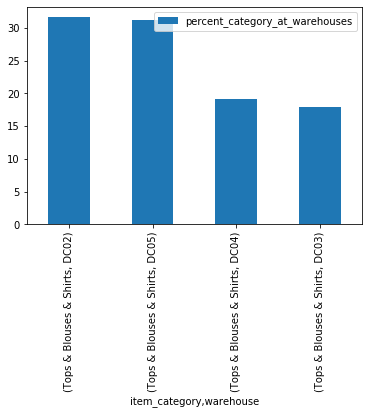

In [32]:
item_cats_warehouses.loc[(['Tops & Blouses & Shirts'],item_cats_warehouses.index.get_level_values(1).unique()),:].sort_values(by='percent_category_at_warehouses', ascending=False).plot.bar(y='percent_category_at_warehouses')

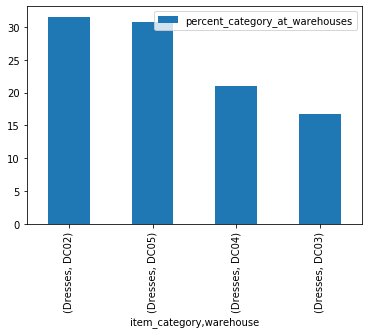

In [33]:
item_cats_warehouses.loc[(['Dresses'],item_cats_warehouses.index.get_level_values(1).unique()),:].sort_values(by='percent_category_at_warehouses', ascending=False).plot.bar(y='percent_category_at_warehouses')

## Merchandise Station Time

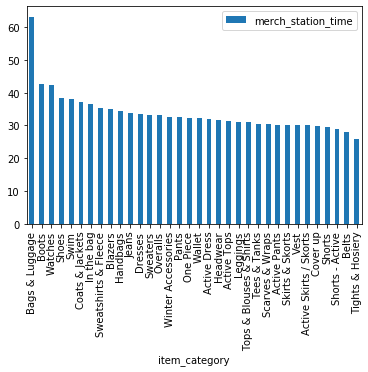

In [34]:
#Bags and luggage have the longest processing time at the merchandise station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.merch_station_time !=0)][['merch_station_time','item_category']].groupby('item_category').mean().sort_values(by='merch_station_time', ascending=False).plot.bar()

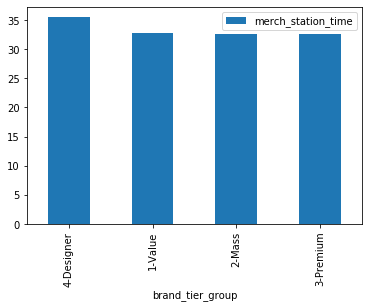

In [35]:
#Designer merchandise has a longer processing time at the merchandise station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.merch_station_time !=0)][['merch_station_time','brand_tier_group']].groupby('brand_tier_group').mean().sort_values(by='merch_station_time', ascending=False).plot.bar()

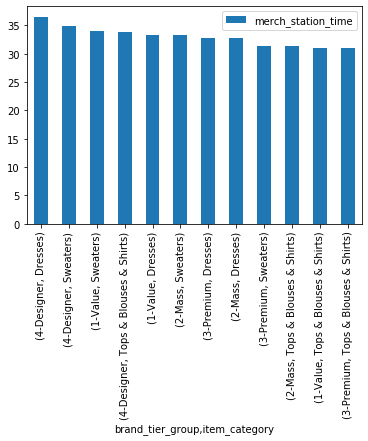

In [36]:
tdf = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.merch_station_time !=0)][['merch_station_time','item_category','brand_tier_group']].groupby(['brand_tier_group','item_category']).mean().sort_values(by='merch_station_time', ascending=False)
tdf.loc[(tdf.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:].sort_values(by='merch_station_time', ascending=False).plot.bar()

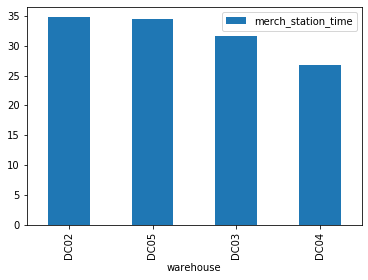

In [37]:
#Warehouse DC04 has the lowest processing time at the merchandise station and DC02 & DC05 has the longest processing time
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.merch_station_time !=0)][['merch_station_time','warehouse']].groupby('warehouse').mean().sort_values(by='merch_station_time', ascending=False).plot.bar()

In [38]:
warehouse_category_merchandise = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.merch_station_time !=0)][['item_category','merch_station_time','warehouse']].groupby(['warehouse','item_category']).mean()
warehouse_category_merchandise.loc[(warehouse_category_merchandise.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:]

merch_station_time
warehouse item_category                              
DC02      Tops & Blouses & Shirts           33.712018
          Dresses                           35.330357
          Sweaters                          35.043478
DC03      Tops & Blouses & Shirts           29.332865
          Dresses                           31.864224
          Sweaters                          32.663239
DC04      Tops & Blouses & Shirts           24.476005
          Dresses                           27.524702
          Sweaters                          26.640118
DC05      Tops & Blouses & Shirts           33.466346
          Dresses                           36.358816
          Sweaters                          34.693598

## Itemization Station Time

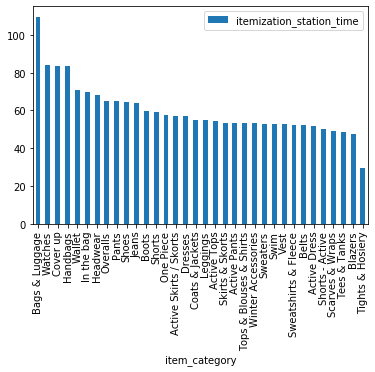

In [39]:
#Bags & Luggage, Handbags, Watches, and Cover Up have the longest processing time at the itemization station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.itemization_station_time !=0)][['itemization_station_time','item_category']].groupby('item_category').mean().sort_values(by='itemization_station_time', ascending=False).plot.bar()

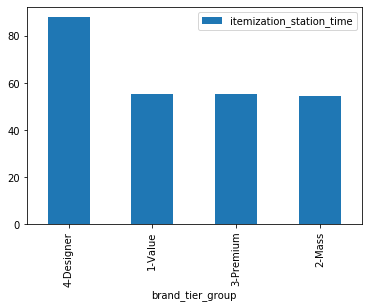

In [40]:
#Designer merchandise takes longer to process at the itemization station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.itemization_station_time !=0)][['itemization_station_time','brand_tier_group']].groupby('brand_tier_group').mean().sort_values(by='itemization_station_time', ascending=False).plot.bar()

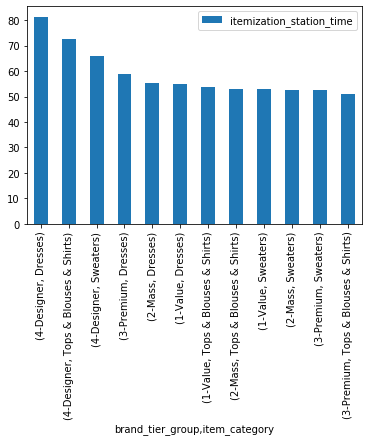

In [41]:
tdf = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.itemization_station_time !=0)][['itemization_station_time','item_category','brand_tier_group']].groupby(['brand_tier_group','item_category']).mean().sort_values(by='itemization_station_time', ascending=False)
tdf.loc[(tdf.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:].sort_values(by='itemization_station_time',ascending=False).plot.bar()

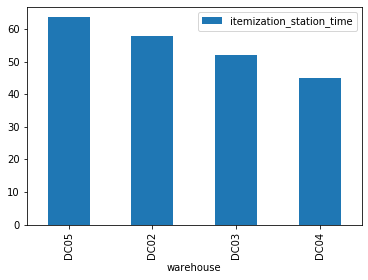

In [42]:
#Warehouse 5 and 2 have longer processing times at the itemization station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.itemization_station_time !=0)][['itemization_station_time','warehouse']].groupby('warehouse').mean().sort_values(by='itemization_station_time', ascending=False).plot.bar()

In [43]:
warehouse_category_itemization = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.itemization_station_time !=0)][['item_category','itemization_station_time','warehouse']].groupby(['warehouse','item_category']).mean()
warehouse_category_itemization.loc[(warehouse_category_itemization.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:]

itemization_station_time
warehouse item_category                                    
DC02      Tops & Blouses & Shirts                 55.944067
          Dresses                                 59.199777
          Sweaters                                54.921269
DC03      Tops & Blouses & Shirts                 49.278090
          Dresses                                 55.502155
          Sweaters                                48.149100
DC04      Tops & Blouses & Shirts                 42.762646
          Dresses                                 44.454855
          Sweaters                                46.398230
DC05      Tops & Blouses & Shirts                 59.961538
          Dresses                                 64.807645
          Sweaters                                56.553354

## Photo Station Time

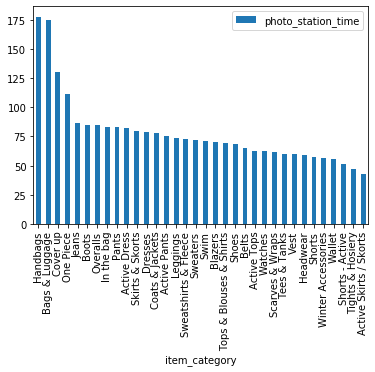

In [44]:
#Handbags take the longest to process at the photo station followed by Luggage, cover up, and one pieces
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.photo_station_time !=0)][['photo_station_time','item_category']].groupby('item_category').mean().sort_values(by='photo_station_time', ascending=False).plot.bar()

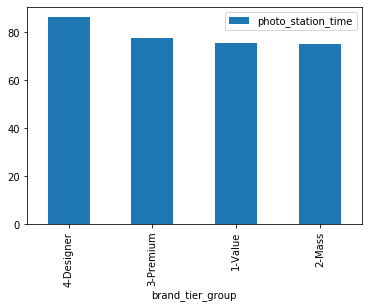

In [45]:
#Designer merchandise take the longest time to process at the photo station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.photo_station_time !=0)][['photo_station_time','brand_tier_group']].groupby('brand_tier_group').mean().sort_values(by='photo_station_time', ascending=False).plot.bar()

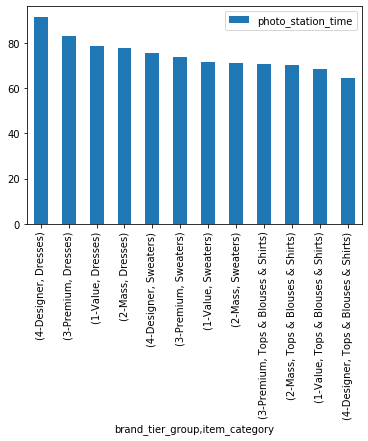

In [46]:
tdf = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.photo_station_time !=0)][['photo_station_time','item_category','brand_tier_group']].groupby(['brand_tier_group','item_category']).mean().sort_values(by='photo_station_time', ascending=False)
tdf.loc[(tdf.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:].sort_values(by='photo_station_time', ascending=False).plot.bar()

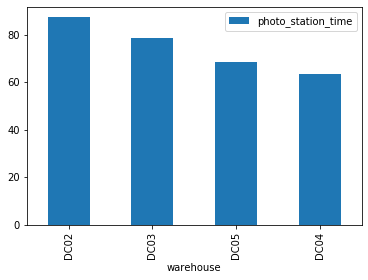

In [47]:
#Warehouses 2 and 3 take the longest time to process merchandise at the photo station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.photo_station_time !=0)][['photo_station_time','warehouse']].groupby('warehouse').mean().sort_values(by='photo_station_time', ascending=False).plot.bar()

In [48]:
warehouse_category_photo = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.photo_station_time !=0)][['item_category','photo_station_time','warehouse']].groupby(['warehouse','item_category']).mean()
warehouse_category_photo.loc[(warehouse_category_photo.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:]

photo_station_time
warehouse item_category                              
DC02      Tops & Blouses & Shirts           84.457294
          Dresses                           88.867188
          Sweaters                          80.622353
DC03      Tops & Blouses & Shirts           66.373596
          Dresses                           88.409483
          Sweaters                          84.670951
DC04      Tops & Blouses & Shirts           58.367056
          Dresses                           66.492334
          Sweaters                          55.421829
DC05      Tops & Blouses & Shirts           61.448718
          Dresses                           72.651048
          Sweaters                          60.728659

## QA Station

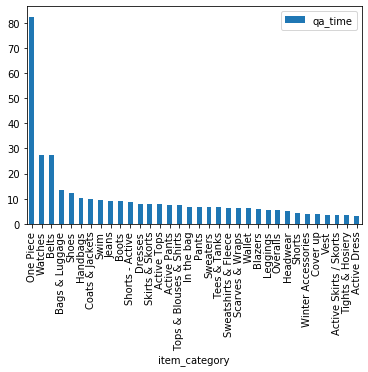

In [49]:
#One pieces, and belts take the longest time to process at the QA station with one pieces taking the longest
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0)][['qa_time','item_category']].groupby('item_category').mean().sort_values(by='qa_time', ascending=False).plot.bar()

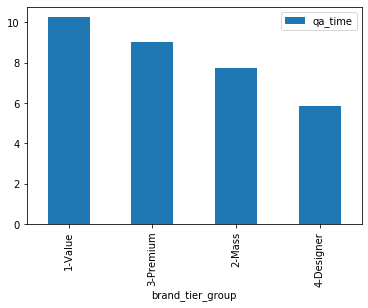

In [50]:
#Designer merchandise has a lower processing time at the qa station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0)][['qa_time','brand_tier_group']].groupby('brand_tier_group').mean().sort_values(by='qa_time', ascending=False).plot.bar()

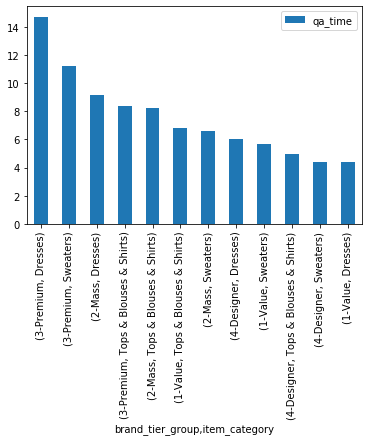

In [51]:
tdf = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0) ][['qa_time','item_category','brand_tier_group']].groupby(['brand_tier_group','item_category']).mean().sort_values(by='qa_time', ascending=False)
tdf.loc[(tdf.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']),:].sort_values(by='qa_time', ascending=False).plot.bar()

In [52]:
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0) ][['qa_time','warehouse']].groupby('warehouse').mean().sort_values(by='qa_time', ascending=False)

,qa_time
warehouse,
DC04,111.050000
DC03,7.117647
DC02,4.690476
DC05,3.000000


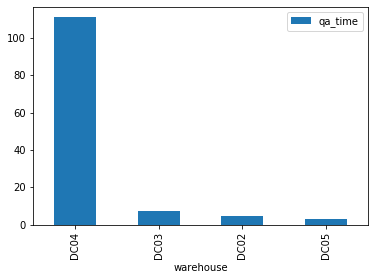

In [53]:
#DC04 has the longest processing time at the qa station
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0) ][['qa_time','warehouse']].groupby('warehouse').mean().sort_values(by='qa_time', ascending=False).plot.bar()

In [54]:
warehouse_category_qa = merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0)][['item_category','qa_time','warehouse']].groupby(['warehouse','item_category']).mean()
warehouse_category_qa.loc[(warehouse_category_qa.index.get_level_values(0),['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']), :]

qa_time
warehouse item_category                     
DC02      Tops & Blouses & Shirts   3.875000
          Dresses                   5.000000
          Sweaters                  3.333333
DC03      Tops & Blouses & Shirts   6.169591
          Dresses                   7.171296
          Sweaters                  6.593750
DC04      Tops & Blouses & Shirts  57.700000
          Dresses                  69.000000
          Sweaters                 20.500000
DC05      Tops & Blouses & Shirts        NaN
          Dresses                        NaN
          Sweaters                       NaN

## Total Time

In [55]:
#Bags/Luggage, Handbags, and Cover up take the longest time to process overall (unweighted)
merch_processing[['total_time','item_category']].groupby('item_category').mean().sort_values(by='total_time', ascending=False)

,total_time
item_category,
Bags & Luggage,270.250000
Handbags,269.358871
Cover up,224.277778
Boots,184.858300
Watches,183.888889
Overalls,179.413793
In the bag,177.714286
Jeans,175.098919
Pants,169.790698


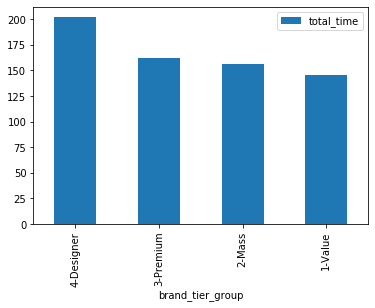

In [56]:
#Designer merchandise takes the longest to process overall
merch_processing[['total_time','brand_tier_group']].groupby('brand_tier_group').mean().sort_values(by='total_time', ascending=False).plot.bar()

# Which station has the longest processing time?

In [57]:
#DC02 takes the longest total time to process merchandise
merch_processing[['merch_station_time','itemization_station_time', 'photo_station_time', 'qa_time']].mean().sort_values(ascending=False)

photo_station_time          60.554382
itemization_station_time    54.151606
merch_station_time          33.116045
qa_time                      0.810672
dtype: float64

# How long does it take each warehouse to process items overall? 

In [58]:
#DC02 takes the longest total time to process merchandise
merch_processing[['total_time','warehouse']].groupby('warehouse').mean().sort_values(by='total_time', ascending=False)

,total_time
warehouse,
DC02,162.783258
DC05,149.567807
DC03,147.198362
DC04,121.672090


# How many items does each warehouse process? 

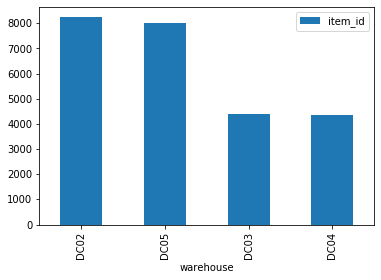

In [59]:
#DC02 and DC05 process the most merchandise
merch_processing[['item_id','warehouse']].groupby('warehouse').count().sort_values(by='item_id', ascending=False).plot.bar()

In [60]:
#Warehouses 2 and 5 process the highest percentage of items across all brand tiers
tier_warehouses = merch_processing[['brand_tier_group','warehouse','item_id']].groupby(['brand_tier_group', 'warehouse']).count()
tier_warehouses['Percent_brands_at_warehouses'] =  tier_warehouses.groupby(level=0).transform(lambda x: x/(x.sum())*100)
tier_warehouses.sort_values(by=['brand_tier_group', 'Percent_brands_at_warehouses'], ascending=False)

item_id  Percent_brands_at_warehouses
brand_tier_group warehouse                                       
4-Designer       DC02           439                     38.307155
                 DC05           400                     34.904014
                 DC04           158                     13.787086
                 DC03           149                     13.001745
3-Premium        DC02          1109                     36.600660
                 DC05           892                     29.438944
                 DC04           531                     17.524752
                 DC03           498                     16.435644
2-Mass           DC02          2469                     31.808812
                 DC05          2403                     30.958516
                 DC03          1462                     18.835352
                 DC04          1428                     18.397320
1-Value          DC02          3575                     32.582938
                 DC05          3564                     32.482683
                 DC04          1945                     17.726941
                 DC03          1888                     17.207437

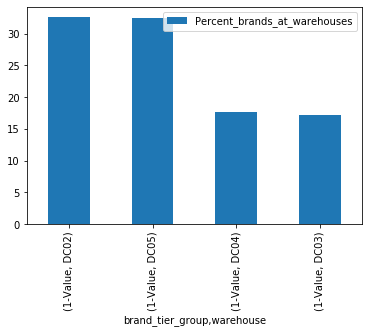

In [61]:
#Warehouse 2 and 5 process the most value items
tier_warehouses.loc[(['1-Value'], item_cats_warehouses.index.get_level_values(1).unique()),:].sort_values(by='Percent_brands_at_warehouses', ascending=False).plot.bar(y='Percent_brands_at_warehouses')

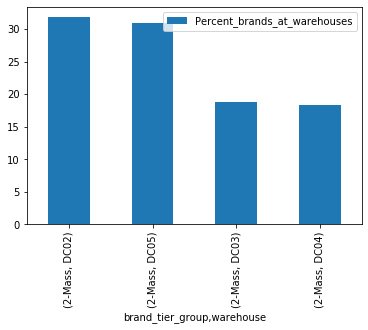

In [62]:
#Warehouses 2 and 5 process the most mass items
tier_warehouses.loc[(['2-Mass'], item_cats_warehouses.index.get_level_values(1).unique()),:].sort_values(by='Percent_brands_at_warehouses', ascending=False).plot.bar(y='Percent_brands_at_warehouses')

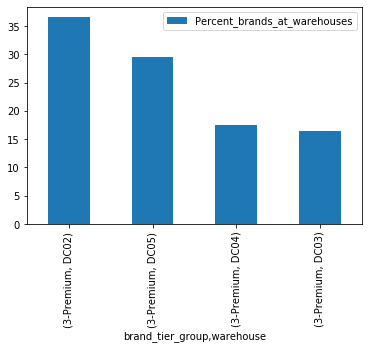

In [63]:
#2 and 5 process the most premium items
tier_warehouses.loc[(['3-Premium'], item_cats_warehouses.index.get_level_values(1).unique()),:].sort_values(by='Percent_brands_at_warehouses', ascending=False).plot.bar(y='Percent_brands_at_warehouses')

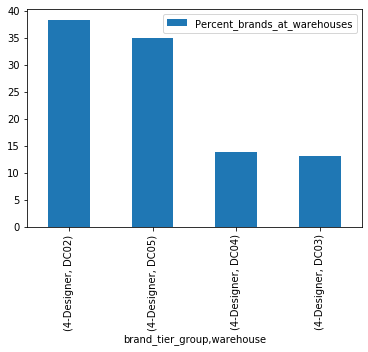

In [64]:
#2 and 5 process the most designer items
tier_warehouses.loc[(['4-Designer'], item_cats_warehouses.index.get_level_values(1).unique()),:].sort_values(by='Percent_brands_at_warehouses', ascending=False).plot.bar(y='Percent_brands_at_warehouses')

# Item Accepted Or Rejected Analysis
<pre>
<strong>Categorical Variables</strong>
item_category                      category
brand_tier_group                   category

</pre>
<strong>Key Findings</strong>
<ul>
    <li>More value items are rejected at the warehouse than any other brand-tier group</li>
    <li>Accepted items have a longer processing time on average, implying that rejections usually occur toward the beginning of the process</li>
    <li>Items that are rejected usually don't spend much time at the QA station on average</li>
    <li>Items that are ulimately rejected rarely make it to the photo station and the QA station</li>
    <li>Most of the items rejected are rejected at the itemization station</li>
    <li>9% of the rejected items are rejected at the merchandise station, 81% at the itemization station, 9.6% at the photo station, and 1% at the QA station</li>
    <li>Higher processing time items have a higher percentage of rejected items than lower processing time items</li>
    <li>Items with higher processing times are typically more expensive</li>
</ul>

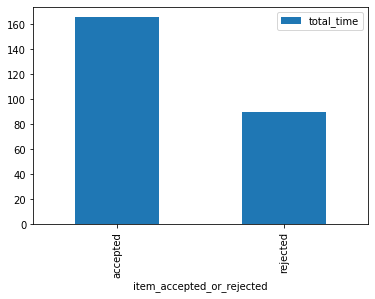

In [65]:
#Accepted items have a longer processing time on average, 
#implying that rejections usually occur toward the beginning of the process
merch_processing[["item_accepted_or_rejected", "total_time"]].groupby('item_accepted_or_rejected').mean().plot.bar()

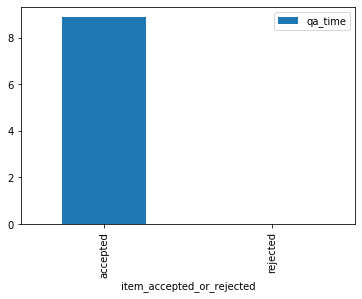

In [66]:
merch_processing[(merch_processing.item_accepted_or_rejected != 'rejected') & (merch_processing.qa_time !=0) ][["item_accepted_or_rejected", "qa_time"]].groupby('item_accepted_or_rejected').mean().plot.bar()

In [67]:
#Items that are ulimately rejected rarely make it to the photo station and the QA station 
#Most of the items rejected are rejected at the itemization station

#We assume that 0 time at a station means that the item was rejected before reaching that station. 
# We change these to NaN values in this cell block to remove them from the aggregation count.
temp_series = merch_processing[merch_processing['item_accepted_or_rejected']=='rejected'][['item_id','merch_station_time', 'itemization_station_time', 'photo_station_time', 'qa_time']].replace(to_replace=0, value=np.nan).count()
temp_series

#The difference in items from one station to another represent the number of items rejected at the earlier station. 
#In the below cell block, we use the shift method with a value of -1 to obtain this difference. 

item_id                     5617
merch_station_time          5617
itemization_station_time    5154
photo_station_time           598
qa_time                       57
dtype: int64

In [68]:
# 9% of the rejected items are rejected at the merchandise station. 
# 81% are rejected at the itemization station 
# 9.6% at the photo station 
# 1% at the QA station

perc_rejected_at_each_station = pd.DataFrame(temp_series/temp_series.item_id*100) - pd.DataFrame(temp_series/temp_series.item_id*100).shift(-1)
perc_rejected_at_each_station.loc['qa_time'] = (temp_series/temp_series.item_id*100)[-1]
perc_rejected_at_each_station.columns = ['Percent Rejected By Station']
perc_rejected_at_each_station.index = ['On Receipt', 'Merchandise Station', 'Itemization Station', 'Photo Station', 'QA Station']
perc_rejected_at_each_station

,Percent Rejected By Station
On Receipt,0.000000
Merchandise Station,8.242834
Itemization Station,81.110913
Photo Station,9.631476
QA Station,1.014777


In [69]:
print("All", merch_processing.shape)
print("Rejected", merch_processing[merch_processing['item_accepted_or_rejected']=='rejected'].shape)
print("Accepted", merch_processing[merch_processing['item_accepted_or_rejected']=='accepted'].shape)
print("Percent rejected", merch_processing[merch_processing['item_accepted_or_rejected']=='rejected'].shape[0]/merch_processing.shape[0])
print("Percent accepted", merch_processing[merch_processing['item_accepted_or_rejected']=='accepted'].shape[0]/merch_processing.shape[0])

All (24999, 15)
Rejected (5617, 15)
Accepted (19382, 15)
Percent rejected 0.22468898755950237
Percent accepted 0.7753110124404976


In [70]:
#items without zeros in station time columns filtered by accepted items
temp_series = merch_processing[merch_processing['item_accepted_or_rejected']=='accepted'][['item_id','merch_station_time', 'itemization_station_time', 'photo_station_time', 'qa_time']].replace(to_replace=0, value=np.nan).count()
temp_series

item_id                     19382
merch_station_time          19382
itemization_station_time    19382
photo_station_time          19379
qa_time                      2233
dtype: int64

In [71]:
#More value items are rejected at the warehouse than any other brand-tier group
accepted_brand = merch_processing[["item_accepted_or_rejected", "brand_tier_group", 'item_id']].groupby(['brand_tier_group', 'item_accepted_or_rejected']).count()
accepted_brand['percent_accepted_rejected'] = accepted_brand.groupby(level=0).item_id.transform(lambda x: x/(x[0]+x[1])*100)
accepted_brand

item_id  percent_accepted_rejected
brand_tier_group item_accepted_or_rejected                                    
1-Value          accepted                      8257                  75.255195
                 rejected                      2715                  24.744805
2-Mass           accepted                      6863                  88.417934
                 rejected                       899                  11.582066
3-Premium        accepted                      2718                  89.702970
                 rejected                       312                  10.297030
4-Designer       accepted                       963                  84.031414
                 rejected                       183                  15.968586

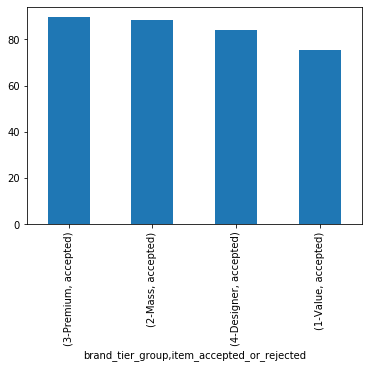

In [72]:
#Percent of items accepted by brand
accepted_brand.loc[(accepted_brand.index.get_level_values(0),'accepted'),'percent_accepted_rejected'].sort_values(ascending=False).plot.bar()

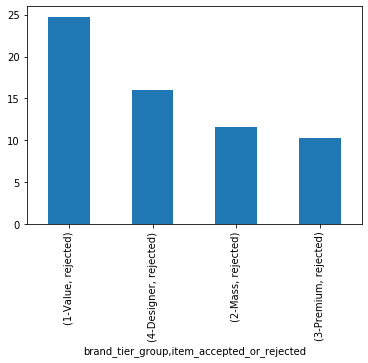

In [73]:
#Percent of rejected items by brand
accepted_brand.loc[(accepted_brand.index.get_level_values(0),'rejected'),'percent_accepted_rejected'].sort_values(ascending=False).plot.bar()

In [74]:
accepted_category = merch_processing[["item_accepted_or_rejected", "item_category", 'item_id']].groupby(['item_category', 'item_accepted_or_rejected']).count()
accepted_category['percent_accepted_rejected'] = accepted_category.groupby(level=0).item_id.transform(lambda x: x/(x[0]+x[1])*100)
accepted_category.loc[['Tops & Blouses & Shirts', 'Dresses', 'Sweaters'],:]

item_id  \
item_category           item_accepted_or_rejected            
Tops & Blouses & Shirts accepted                      4054   
                        rejected                       669   
Dresses                 accepted                      2758   
                        rejected                       289   
Sweaters                accepted                      2235   
                        rejected                       188   

                                                   percent_accepted_rejected  
item_category           item_accepted_or_rejected                             
Tops & Blouses & Shirts accepted                                   85.835274  
                        rejected                                   14.164726  
Dresses                 accepted                                   90.515261  
                        rejected                                    9.484739  
Sweaters                accepted                                   92.241024  
                        rejected                                    7.758976

In [75]:
#mean of percent accepted rejected by low processing time categories 
categories = list(accepted_category.index.get_level_values(0).unique())
for x in ['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']:
    categories.remove(x) 
accepted_category.loc[categories,:].mean(level=['item_accepted_or_rejected'])

,item_id,percent_accepted_rejected
item_accepted_or_rejected,,
accepted,333.387097,82.655723
rejected,84.741935,17.344277


In [76]:
#Higher processing time items have a higher percentage of rejected items than lower processing time items
high_processing_time_items =['Tops & Blouses & Shirts', 'Dresses', 'Sweaters']
accepted_category.loc[high_processing_time_items, :].mean(level=['item_accepted_or_rejected'])

,item_id,percent_accepted_rejected
item_accepted_or_rejected,,
accepted,3015.666667,89.53052
rejected,382.000000,10.46948


## Long Processing Time

In [77]:
#Use the Inter Quartile Range to identify outliers
Q1 = merch_processing['total_time'].quantile(0.25)
Q3 = merch_processing['total_time'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

79.0


In [78]:
#Create a column identifying items with longer processing time based on the interquartile range
#This column identifies these items differently than the SQL query at the beginning 
# (just to demonstrate two ways of looking at the same thing) 
merch_processing['long_processing_time'] = merch_processing['total_time'][(merch_processing['total_time'] > (Q3 + 1.5 * IQR))].notnull()

In [79]:
#Replace NaN values with False (The line above creates a column with value True for observations with a long processing time
#and value NaN for those without a long processing time)
merch_processing['long_processing_time'].fillna(False, inplace=True)

In [80]:
print(merch_processing[['total_time', 'long_processing_time']][merch_processing['long_processing_time']==True].shape)
print(merch_processing[['total_time', 'long_processing_time']][merch_processing['long_processing_time']==False].shape)

(1636, 2)
(23363, 2)


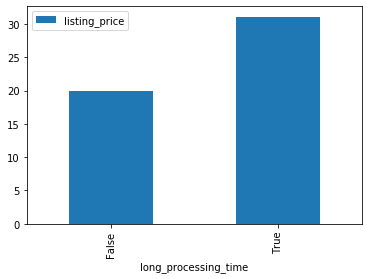

In [81]:
#Items with higher processing times are typically more expensive
merch_processing[['listing_price','long_processing_time']].groupby('long_processing_time').mean().plot.bar()

In [82]:
temp_df = merch_processing[['item_accepted_or_rejected','long_processing_time', 'item_id']].groupby(['long_processing_time','item_accepted_or_rejected']).count()
temp_df['percent'] = temp_df.groupby(level=0).transform(lambda x: x/x.sum()*100)
temp_df

item_id    percent
long_processing_time item_accepted_or_rejected                    
False                accepted                     17881  76.535548
                     rejected                      5482  23.464452
True                 accepted                      1501  91.748166
                     rejected                       135   8.251834

## Listing Price

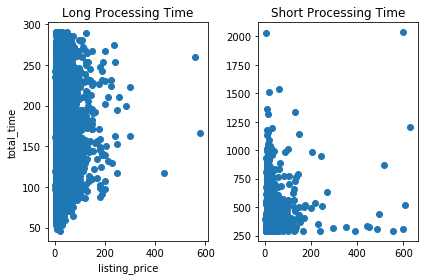

In [83]:
y1 = merch_processing[merch_processing['long_processing_time']==False]['total_time']
y2 = merch_processing[merch_processing['long_processing_time']==True]['total_time']
y3 = merch_processing['total_time']

x1 = merch_processing[merch_processing['long_processing_time']==False]['listing_price']
x2 = merch_processing[merch_processing['long_processing_time']==True]['listing_price']
x3 = merch_processing['listing_price']

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.xlabel('listing_price')
plt.ylabel('total_time')
plt.title('Long Processing Time')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('Short Processing Time')

plt.tight_layout()
plt.show()

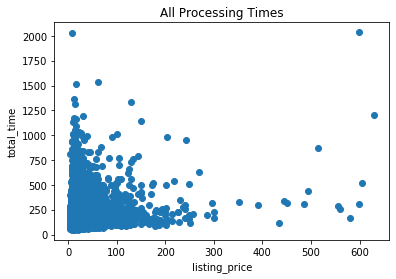

In [84]:
plt.scatter(x3, y3)
plt.title('All Processing Times')
plt.xlabel('listing_price')
plt.ylabel('total_time')
plt.show()